In [23]:
import pandas as pd
import numpy as np
import seaborn as sns

In [24]:
df = pd.read_csv("cleaned_chatelet.csv")
df.head()

,DATE,NO,NO2,PM10,CO2,TEMP,HUMI,HOUR,MONTH,WEEK_OF_YEAR,DAY,YEAR,WEEKDAY,WEEKEND,CO2_BEFORE,NO_BEFORE,NO2_BEFORE,PM10_BEFORE
0,2014-01-01 01:00:00+00:00,4.0,29.0,101.0,635.0,19.9,46.3,1,1,1,1,2014,2,0,776.0,6.0,31.0,182.0
1,2014-01-01 02:00:00+00:00,4.0,28.0,89.0,738.0,20.0,46.9,2,1,1,1,2014,2,0,800.0,6.0,30.0,166.0
2,2014-01-01 03:00:00+00:00,4.0,28.0,81.0,775.0,20.1,46.5,3,1,1,1,2014,2,0,799.0,4.0,27.0,124.0
3,2014-01-01 04:00:00+00:00,4.0,29.0,71.0,664.0,19.8,45.3,4,1,1,1,2014,2,0,715.0,3.0,25.0,85.0
4,2014-01-01 05:00:00+00:00,4.0,22.0,66.0,560.0,19.6,44.3,5,1,1,1,2014,2,0,622.0,4.0,26.0,102.0


In [25]:
df['DATE'] = pd.to_datetime(df['DATE'])
df = df.set_index('DATE')
df.describe()


,NO,NO2,PM10,CO2,TEMP,HUMI,HOUR,MONTH,WEEK_OF_YEAR,DAY,YEAR,WEEKDAY,WEEKEND,CO2_BEFORE,NO_BEFORE,NO2_BEFORE,PM10_BEFORE
count,55914.000000,55914.000000,55914.000000,55914.000000,55914.000000,55914.000000,55914.000000,55914.000000,55914.000000,55914.000000,55914.000000,55914.000000,55914.000000,55914.000000,55914.000000,55914.000000,55914.000000
mean,18.980238,32.333924,116.475874,562.250134,21.018425,45.453686,11.613818,6.544765,26.799424,15.489734,2017.890171,3.007601,0.144758,572.941768,21.861609,35.083861,127.992614
std,31.899716,14.312698,102.383060,123.424594,3.590868,9.698991,6.904372,3.494308,15.266645,8.825133,2.649742,2.004501,0.351860,131.238583,34.118900,14.959179,101.966859
min,2.000000,2.000000,5.000000,383.000000,9.300000,17.900000,0.000000,1.000000,1.000000,1.000000,2014.000000,0.000000,0.000000,383.000000,2.000000,4.000000,5.000000
25%,4.000000,22.000000,53.000000,462.000000,18.500000,38.900000,6.000000,3.000000,13.000000,8.000000,2015.000000,1.000000,0.000000,465.000000,4.000000,24.000000,68.000000
50%,7.000000,31.000000,96.000000,538.000000,21.000000,44.500000,12.000000,7.000000,27.000000,15.000000,2017.000000,3.000000,0.000000,548.000000,9.000000,34.000000,111.000000
75%,20.000000,41.000000,157.000000,630.000000,23.500000,50.800000,18.000000,10.000000,40.000000,23.000000,2020.000000,5.000000,0.000000,649.000000,26.000000,44.000000,167.000000
max,768.000000,360.000000,1000.000000,2321.000000,30.700000,100.000000,23.000000,12.000000,53.000000,31.000000,2022.000000,6.000000,1.000000,2321.000000,768.000000,360.000000,1000.000000


<AxesSubplot: >

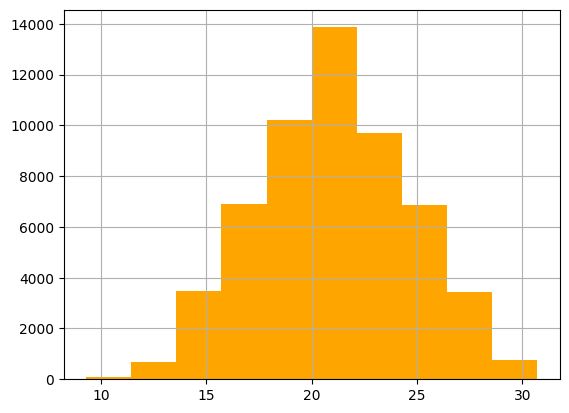

In [26]:
df.TEMP.hist(color='orange')

<AxesSubplot: >

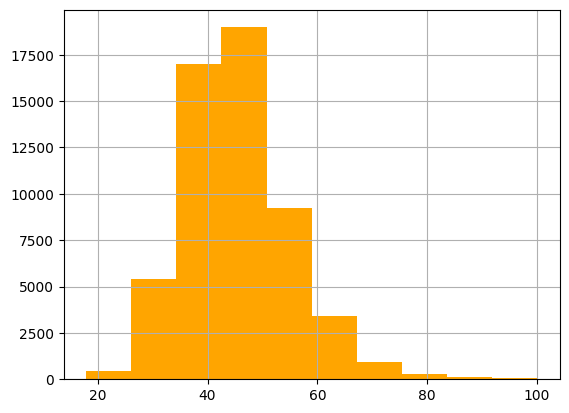

In [27]:
df.HUMI.hist(color='orange')

TEMP and HUMI are approximately normally distributed, which might already hint to a good performance of a Gaussian Naive Bayes model.

<AxesSubplot: >

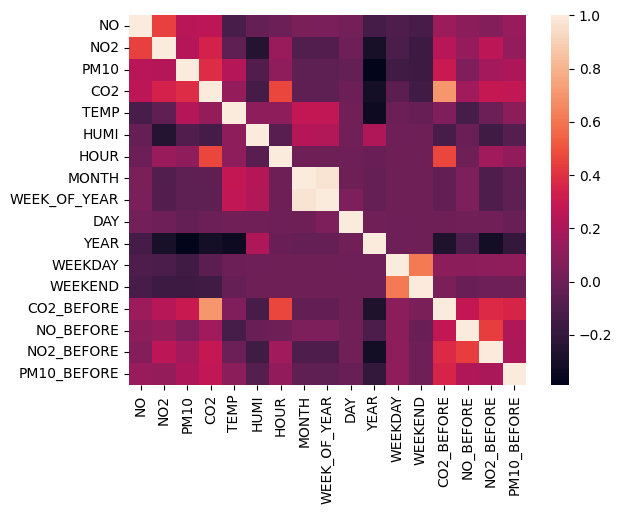

In [28]:
sns.heatmap(df.corr())

Moderate correlation between CO2 value of last year and this year. No apparent correlation between CO2 and time of year.

In [29]:
monthly_data = df
monthly_data = monthly_data.resample("M").mean()
monthly_data.head()

,NO,NO2,PM10,CO2,TEMP,HUMI,HOUR,MONTH,WEEK_OF_YEAR,DAY,YEAR,WEEKDAY,WEEKEND,CO2_BEFORE,NO_BEFORE,NO2_BEFORE,PM10_BEFORE
DATE,,,,,,,,,,,,,,,,,
2014-01-31 00:00:00+00:00,4.0,39.230447,128.969274,642.381285,19.581285,45.107263,11.729050,1.0,3.006983,16.037709,2014.0,2.988827,0.129888,623.962291,36.096369,41.019553,108.290503
2014-02-28 00:00:00+00:00,4.0,44.638191,133.063652,615.899497,19.710218,41.935511,12.008375,2.0,7.291457,15.128978,2014.0,3.088777,0.154104,612.237856,28.492462,41.844221,96.067002
2014-03-31 00:00:00+00:00,4.0,53.601408,147.708451,620.083099,20.758732,38.201972,11.767606,3.0,11.401408,15.866197,2014.0,3.056338,0.159155,641.270423,25.698592,51.391549,99.684507
2014-04-30 00:00:00+00:00,4.0,43.454416,165.786325,619.880342,20.514387,40.404274,11.659544,4.0,15.797721,15.472934,2014.0,2.888889,0.132479,587.401709,25.595442,55.790598,143.374644
2014-05-31 00:00:00+00:00,4.0,37.500730,145.832117,606.059854,20.922774,42.711241,11.772263,5.0,20.166423,16.300730,2014.0,3.135766,0.134307,554.811679,24.497810,44.548905,173.586861


<AxesSubplot: xlabel='DATE'>

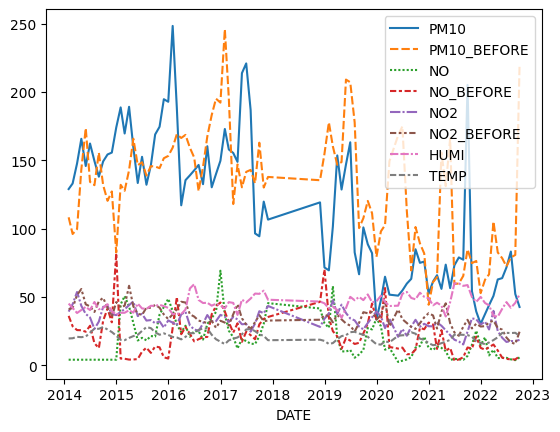

In [34]:
sns.lineplot(data=monthly_data[['PM10', 'PM10_BEFORE','NO','NO_BEFORE','NO2','NO2_BEFORE','HUMI','TEMP']])

In [31]:
monthly_data_combined = monthly_data.groupby(monthly_data.index.month).mean()
monthly_data_combined.head()

,NO,NO2,PM10,CO2,TEMP,HUMI,HOUR,MONTH,WEEK_OF_YEAR,DAY,YEAR,WEEKDAY,WEEKEND,CO2_BEFORE,NO_BEFORE,NO2_BEFORE,PM10_BEFORE
DATE,,,,,,,,,,,,,,,,,
1,26.594885,34.871562,119.372665,585.295856,16.857037,43.020936,11.558519,1.0,4.657133,16.320546,2018.000000,3.068260,0.146512,599.798557,26.895589,36.158092,130.624050
2,24.964412,34.828951,115.696570,584.984362,17.720254,42.880368,11.642216,2.0,6.914790,14.512834,2018.000000,2.984302,0.140704,591.896447,27.632615,36.478499,122.769046
3,18.550106,38.769561,115.163150,573.659440,18.652016,40.620550,11.622450,3.0,10.923750,14.239576,2018.000000,2.898324,0.164578,593.226861,18.945033,41.283525,135.494285
4,14.522800,36.811233,124.968806,564.908776,20.261305,37.468998,11.498817,4.0,15.222936,13.927685,2017.714286,3.081422,0.148515,575.308552,17.397279,42.202177,141.046811
5,10.481361,29.189612,118.779386,534.923321,21.855340,45.603911,11.920206,5.0,20.285397,18.987639,2018.000000,3.114862,0.155045,552.697699,14.917882,35.227604,153.918828


<AxesSubplot: xlabel='DATE'>

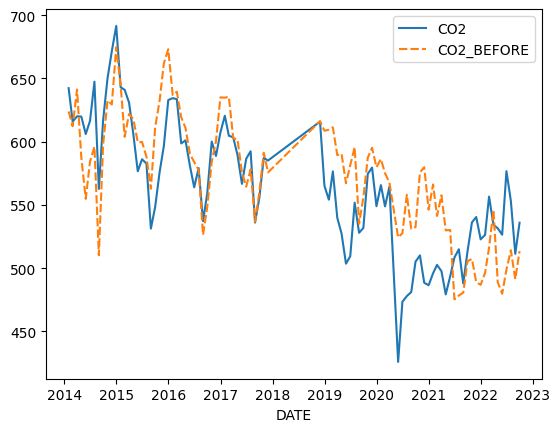

In [32]:
sns.lineplot(data=monthly_data[['CO2', 'CO2_BEFORE']])

<AxesSubplot: xlabel='DATE'>

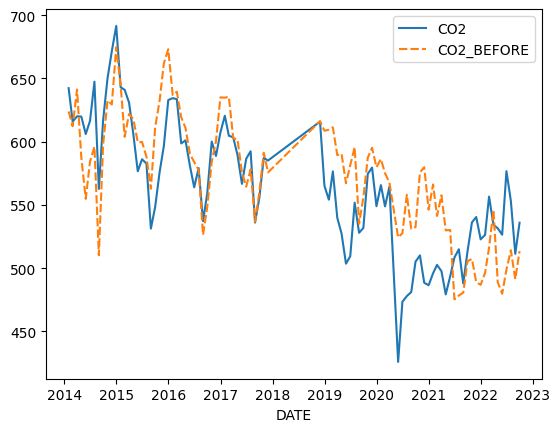

In [36]:
sns.lineplot(data=monthly_data[['CO2_QUANT', 'CO2_BEFORE_QUANT']])

The two gaphs are quite similar, making quantiles a fit substitute for the continous values of CO2.

<AxesSubplot: xlabel='DATE'>

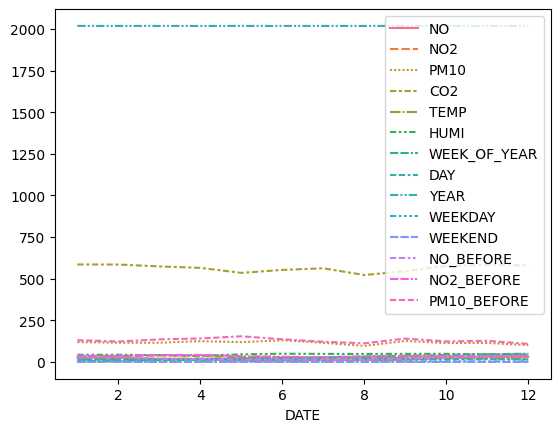

In [37]:
# we can drop the CO2 in order to make the other progressions more visible
# sns.lineplot(data=monthly_data_combined.drop('CO2', axis=1))
sns.lineplot(data=monthly_data_combined.drop(columns=['MONTH','HOUR','CO2_BEFORE']))

Not much difference throughout the year, except for a slight drop in CO2 and NO in summer.

In [38]:
hourly_data = df.groupby(df.index.hour).mean()
hourly_data.index.rename('HOUR', inplace=True)
hourly_data.head()

,NO,NO2,PM10,CO2,TEMP,HUMI,HOUR,MONTH,WEEK_OF_YEAR,DAY,YEAR,WEEKDAY,WEEKEND,CO2_BEFORE,NO_BEFORE,NO2_BEFORE,PM10_BEFORE
HOUR,,,,,,,,,,,,,,,,,
0,14.157623,31.581395,88.955211,481.844100,21.017313,44.767399,0.0,6.537468,26.719208,15.453919,2017.919897,3.009044,0.145134,482.280362,15.281654,32.917743,98.061154
1,14.349157,30.169476,96.241349,458.113576,20.756744,45.240195,1.0,6.562555,26.860692,15.346939,2017.981366,3.018190,0.149068,455.334960,15.967169,31.530612,106.627773
2,13.367852,27.762719,102.820801,444.416029,20.652274,45.662584,2.0,6.542098,26.788384,15.464205,2017.967582,3.021612,0.147681,441.485817,14.697434,29.167942,114.339487
3,12.139269,25.624658,93.394977,437.260274,20.520868,45.955799,3.0,6.567123,26.890868,15.451598,2017.996347,3.033333,0.146575,435.770320,12.866210,26.752511,100.842922
4,11.448523,24.261862,70.666517,438.588630,20.472202,46.191987,4.0,6.586392,26.983885,15.513429,2017.963742,3.019248,0.144584,438.050134,11.892569,25.774843,73.330349


<AxesSubplot: xlabel='DATE', ylabel='CO2'>

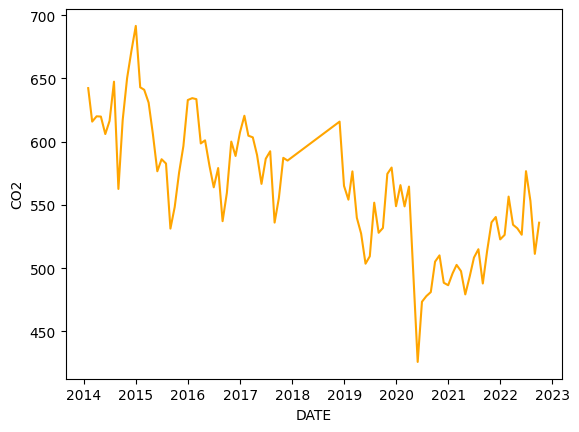

In [39]:
sns.lineplot(data=monthly_data['CO2'], color='orange')

Strong depression in first lockdown 2020

<AxesSubplot: xlabel='HOUR', ylabel='CO2'>

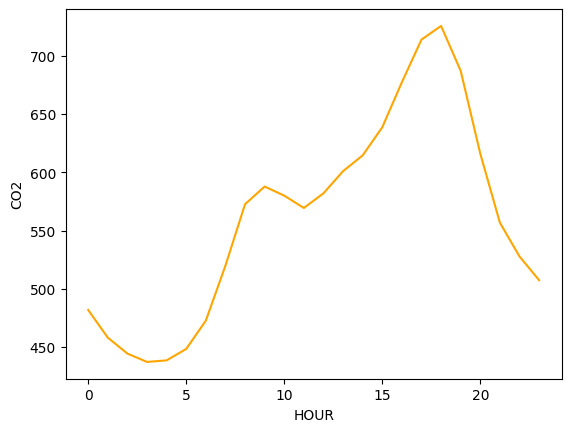

In [40]:
sns.lineplot(data=hourly_data, y='CO2', x='HOUR', color='orange')

Two peaks in CO2 Levels in rush hour (aroung 9:00 and 18:00)

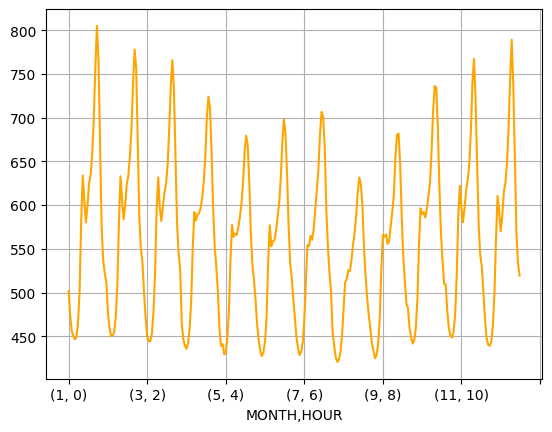

In [42]:
ax = df.groupby(['MONTH', 'HOUR'])['CO2'].mean().plot(kind='line', color='orange', grid=True)

The morning rushhour peak is less prominent or completely disappeared in the sumer months, which makes sense because most working people and students are taking vacation.

In [ ]:
# ... more EDA